# Ajuste de curvas: caso não-linear

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Motivação: comportamento de fluidos lei de potência

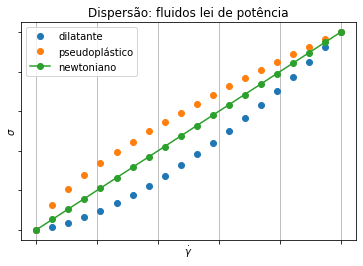

In [2]:
gamma = np.linspace(0,1,20,True)
n1 = 1.5 # dilatante
n2 = 0.7 # pseudoplastico
k = 0.1
tau1 = k*gamma**n1
tau2 = k*gamma**n2
tau3 = k*gamma

plt.plot(gamma,tau1,'o',label='dilatante')
plt.plot(gamma,tau2,'o',label='pseudoplástico')
plt.plot(gamma,tau3,'-o',label='newtoniano')
plt.legend()
plt.xlabel('$\dot{\gamma}$')
plt.ylabel('$\sigma}$')
plt.grid(axis='x')
plt.title('Dispersão: fluidos lei de potência')
plt.tick_params(axis='both',which='both',labelbottom=False,labelleft=False)


## Exemplo 

Determine os parâmetros $a$ e $b$ de modo que $y = f(x) = ae^{bx}$ ajuste os seguintes dados no sentido de mínimos quadrados: 

x|y
---|---
1.2|7.5
2.8|16.1
4.3|38.9
5.4|67.0
6.8|146.6
7.9|266.2




Plotando o gráfico de dispersão:

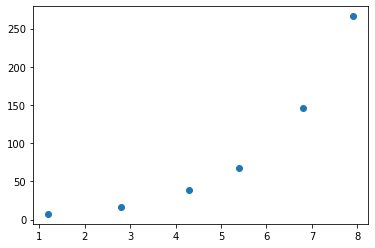

In [3]:
x = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
y = np.array([7.5,16.1,38.9,67.0,146.6,266.2])
plt.plot(x,y,'o');

**Teste de alinhamento:** façamos a linearização 

$$Y = Z + bx,$$

onde $Y = \log(y)$ e $Z = \log(a)$.

Plotemos a dispersão $(x,Y)$.

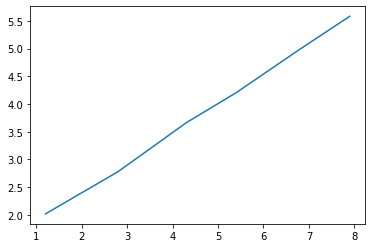

In [13]:
Y = np.log(y)
plt.plot(x,Y);

O teste do alinhamento nos diz que a função de ajuste é adequada para a regressão linear. 

**Regressão linear:** façamos a regressão linear para buscar os parâmetros $b$ e $Z$ do modelo linearizado.

In [5]:
from scipy.stats import linregress

b,Z,R,p,e = linregress(x,Y)
print(f'Inclinação = {b:.3f}; offset = {Z:.3f}; R2 = {R*R:.3f}.')

Inclinação = 0.537; offset = 1.332; R2 = 0.999.


De fato, o coeficiente $R^2 \approx 1.0$ mostra correlação quase máxima no modelo linearizado.

**Comparação entre dados experimentais e ajustados:** plotaremos agora a dispersão e o modelo ajustado.

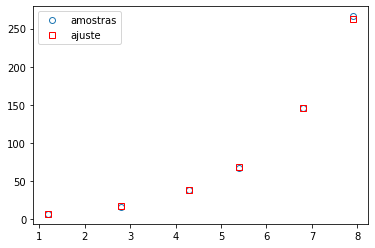

In [10]:
a = np.exp(Z) # recupera o valor de a 
modelo = lambda x: a*np.exp(b*x)

plt.plot(x,y,'o',mfc='None')
plt.plot(x,modelo(x),'rs',mfc='None');
plt.legend(('amostras','ajuste'));

**Estimando valores não tabelados:** visto que o modelo exponencial se acomoda bem aos dados experimentais, agora podemos estimar valores que são desconhecidos, tais como $x = 3.2$ ou $x = 7.5$.

In [7]:
xp = np.array([3.2,7.5]) # valores procurados

for p in xp:
    print(f'Em x = {p:g}, a estimativa é f(x) = {modelo(p):g}')

Em x = 3.2, a estimativa é f(x) = 21.097
Em x = 7.5, a estimativa é f(x) = 211.969


### Exercício

A seguinte tabela mostra a variação de condutividade térmica relativa $k$ de sódio com a temperatura $T$ em graus Celsius. Busque um modelo não-linear que ajusta os dados no sentido de mínimos quadrados.

k|T
---|---
1.00|79
0.932|190
0.839|357
0.759|524
0.693|690
